# **EDA Using Bivariate and Multivariate Analysis**
Exploratory Data Analysis (EDA) is a critical initial step in the data analysis process that involves summarizing, visualizing, and understanding the main characteristics and patterns present in a dataset. Bivariate and multivariate analysis are two important components of EDA that help you explore relationships and interactions between multiple variables in your dataset.

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Read the Data**

In [2]:
# Reading the 'tips' data from seaborn
tips = sns.load_dataset("tips")

In [3]:
# Read the 'titanic' data
titanic = pd.read_csv(r"D:\Coding\Datasets\titanic.csv")

In [4]:
# Read the 'iris' dataset
iris = pd.read_csv("D:\Coding\Datasets\Iris.csv")

In [5]:
# Read the 'flight' data
flights = pd.read_csv(r"D:\Coding\Datasets\flights.csv")

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.shape

(244, 7)

## **Scatter Plot (Numerical - Numerical)**

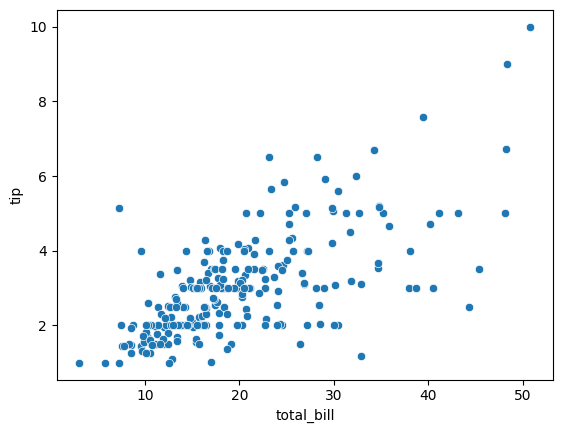

In [8]:
# Plotting a scatterplot between 'total_bill' and 'tip' using univariate analysis
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.show()

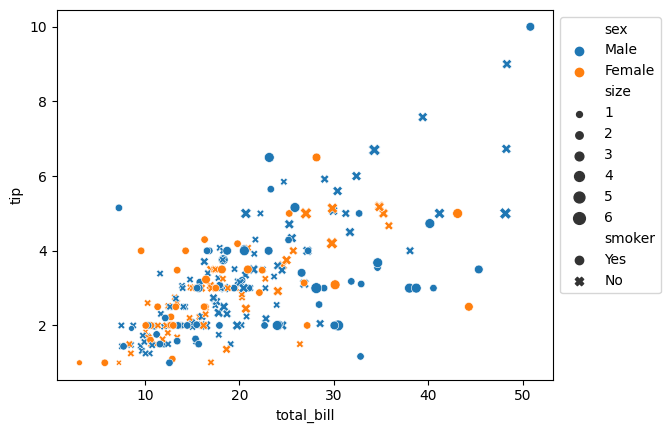

In [9]:
# Plotting a scatterplot between 'total_bill' and 'tip' using multivariate analysis
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", style="smoker", size="size")
plt.legend(bbox_to_anchor=(1, 1), loc=2)

## **Bar Plot (Numerical -Categorical)**

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

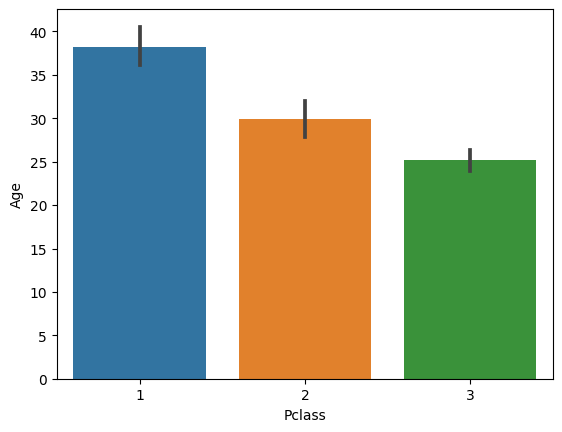

In [11]:
# Plot the avergae age of a passsenger traveling in a particular class
sns.barplot(data=titanic, x="Pclass", y="Age")

<Axes: xlabel='Pclass', ylabel='Age'>

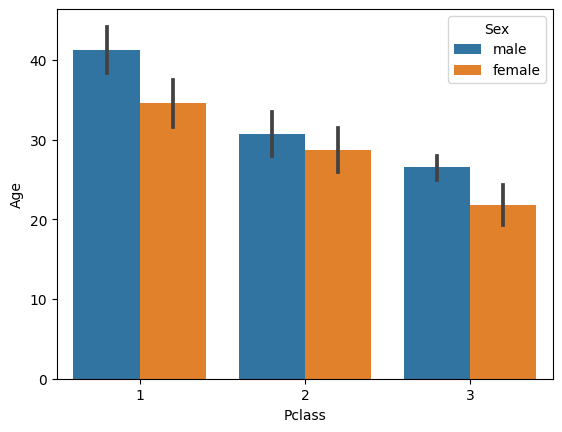

In [12]:
# Plot the avergae age of a passsenger (male and female) traveling in a particular class
sns.barplot(data=titanic, x="Pclass", y="Age", hue="Sex")

<Axes: xlabel='Pclass', ylabel='Fare'>

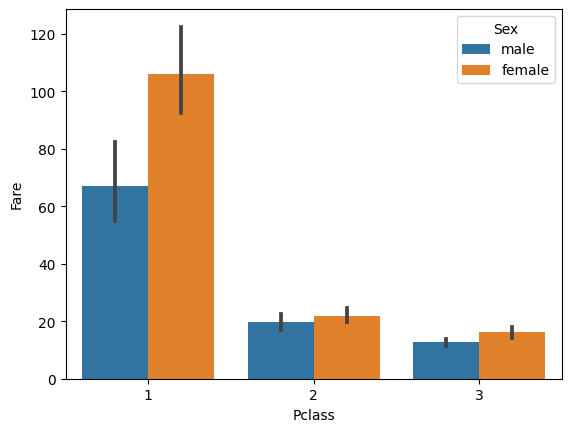

In [13]:
# Plot the avergae fare in a particular class
sns.barplot(data=titanic, x="Pclass", y="Fare", hue="Sex")

## **Box Plot (Numerical - Categorical)**

<Axes: xlabel='Sex', ylabel='Age'>

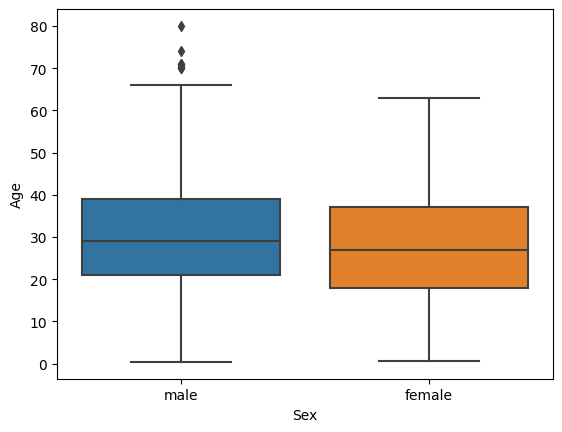

In [14]:
# Plot a boxplot between 'Sex' and 'Age'
sns.boxplot(data=titanic, x="Sex", y="Age")

<Axes: xlabel='Sex', ylabel='Age'>

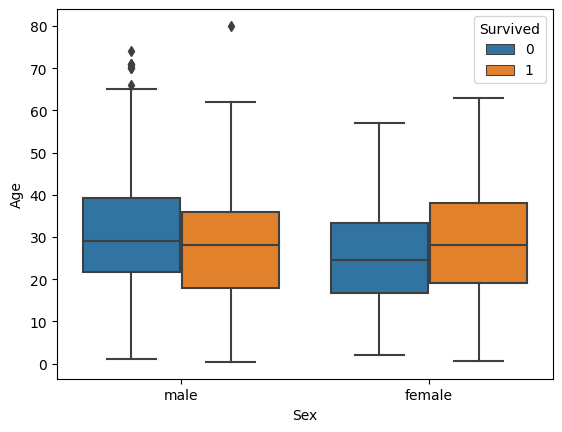

In [15]:
# Plot a boxplot between 'Sex' and 'Age' also show 'Survived'
sns.boxplot(data=titanic, x="Sex", y="Age", hue="Survived")

## **Dist Plot (Numerical - Categorical)**

<Axes: xlabel='Age', ylabel='Density'>

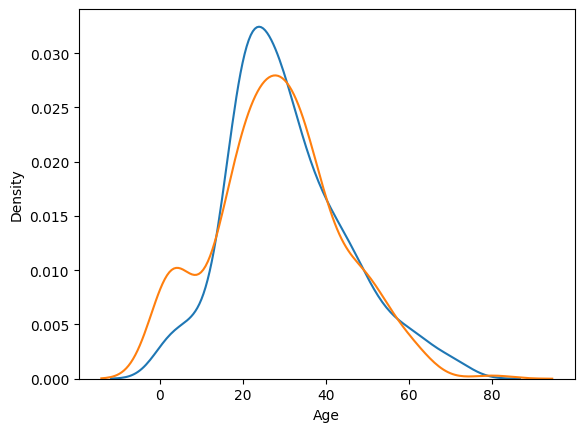

In [16]:
# Plot the relationship between 'Age' and 'Survived'
# Plotting the Age of the people who could not survive
sns.distplot(titanic[titanic["Survived"]==0]["Age"], hist=False)
# Plotting the Age of the people who could survive
sns.distplot(titanic[titanic["Survived"]==1]["Age"], hist=False)

## **Heat Map (Categorical - Categorical)**

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Get the number of people died and survived in each Pclass
pd.crosstab(index=titanic["Pclass"], columns=titanic["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

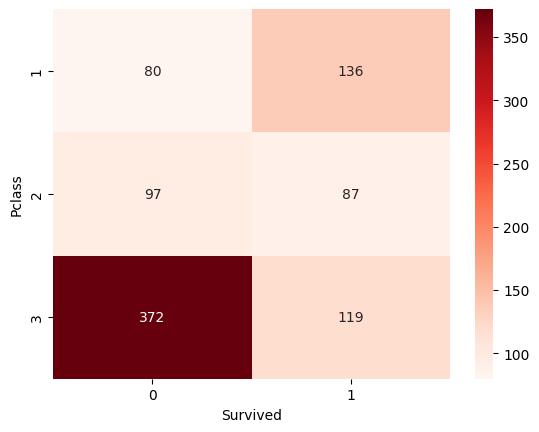

In [19]:
sns.heatmap(pd.crosstab(index=titanic["Pclass"], columns=titanic["Survived"]), cmap="Reds", 
            annot=True, fmt="")

In [20]:
titanic.groupby("Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Text(0, 0.5, '% of People Survived')

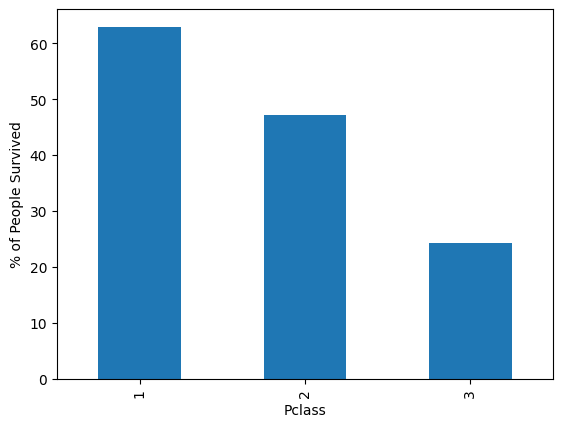

In [21]:
# Percentage of people survived in each Pclass
(titanic.groupby("Pclass").mean()["Survived"]*100).plot(kind="bar")
plt.ylabel("% of People Survived")

## **Cluster Map (Categorical - Categorical)**

In [22]:
# Get the number of people died and survived for each SibSp
pd.crosstab(index=titanic["Parch"], columns=titanic["Survived"])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


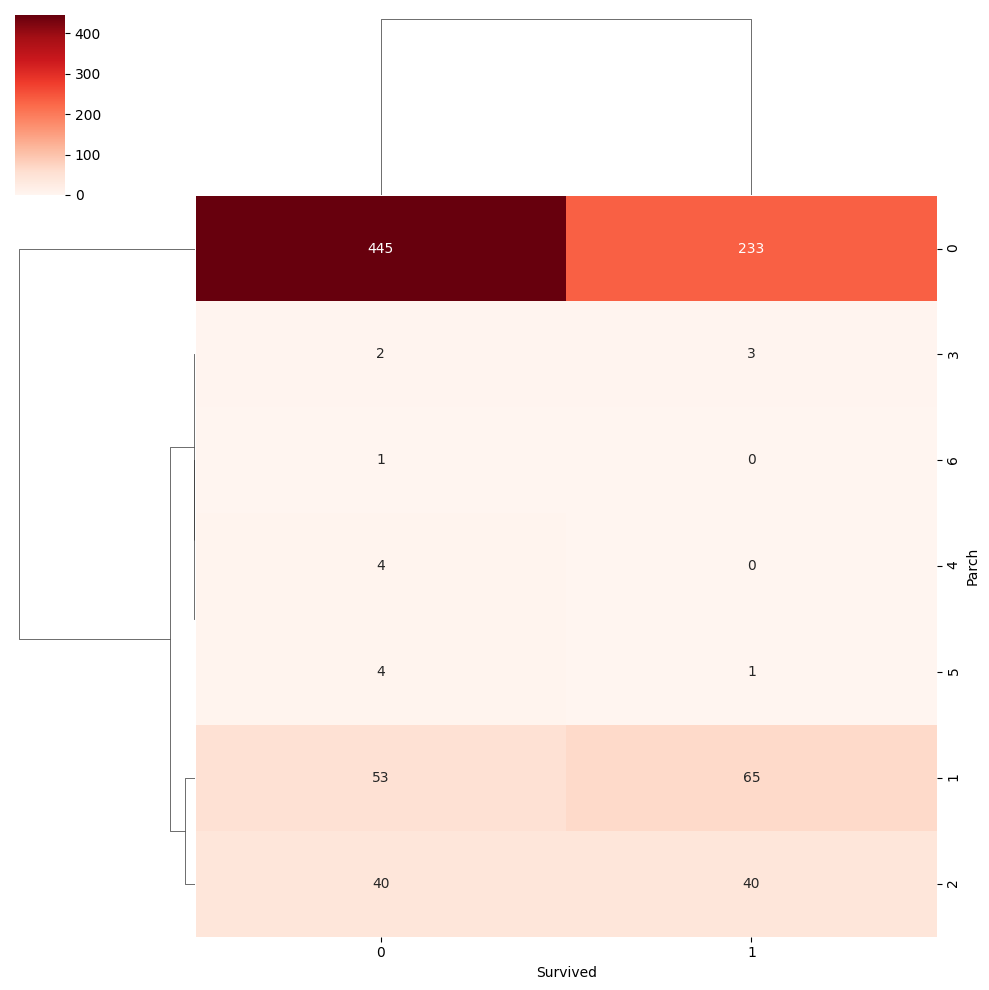

In [23]:
sns.clustermap(pd.crosstab(index=titanic["Parch"], columns=titanic["Survived"]), cmap="Reds", 
               annot=True, fmt="")

## **Pair Plot**

In [24]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


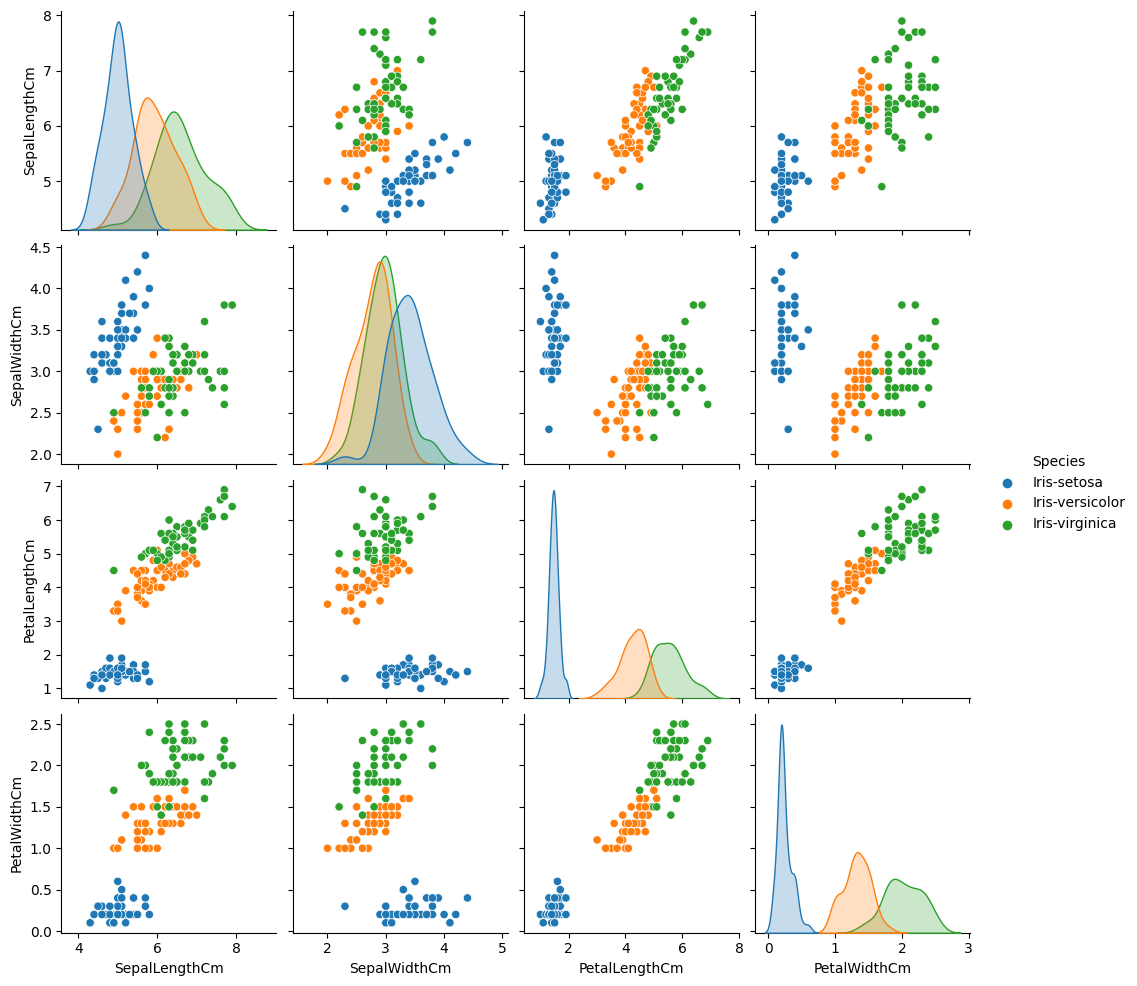

In [25]:
sns.pairplot(iris.iloc[:, 1:], hue="Species")

## **Line Plot (Numerical - Numerical)**

In [26]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [27]:
# Group the number of passengers and calculate total for each year
flights_stat = flights.groupby("year").sum().reset_index()
flights_stat

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

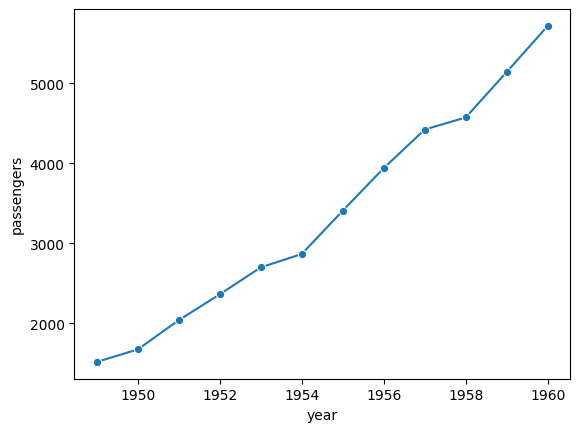

In [28]:
# Create a simple line plot between years and passengers
sns.lineplot(data=flights_stat, x="year", y="passengers", marker="o")

In [29]:
# Create a heatmap 
flights.pivot_table(values="passengers", index="month", columns="year")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


<Axes: xlabel='year', ylabel='month'>

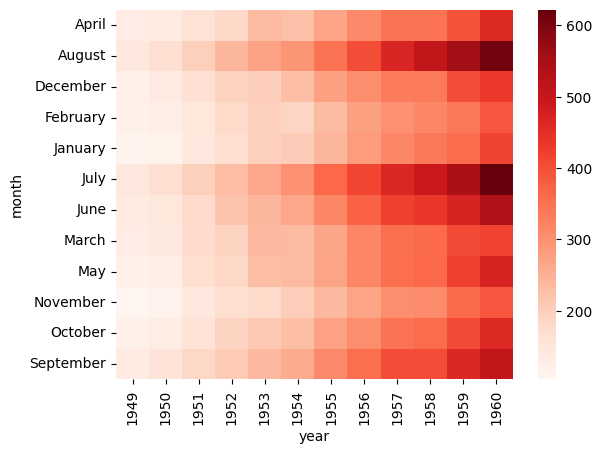

In [30]:
sns.heatmap(flights.pivot_table(values="passengers", index="month", columns="year"),
            cmap="Reds")

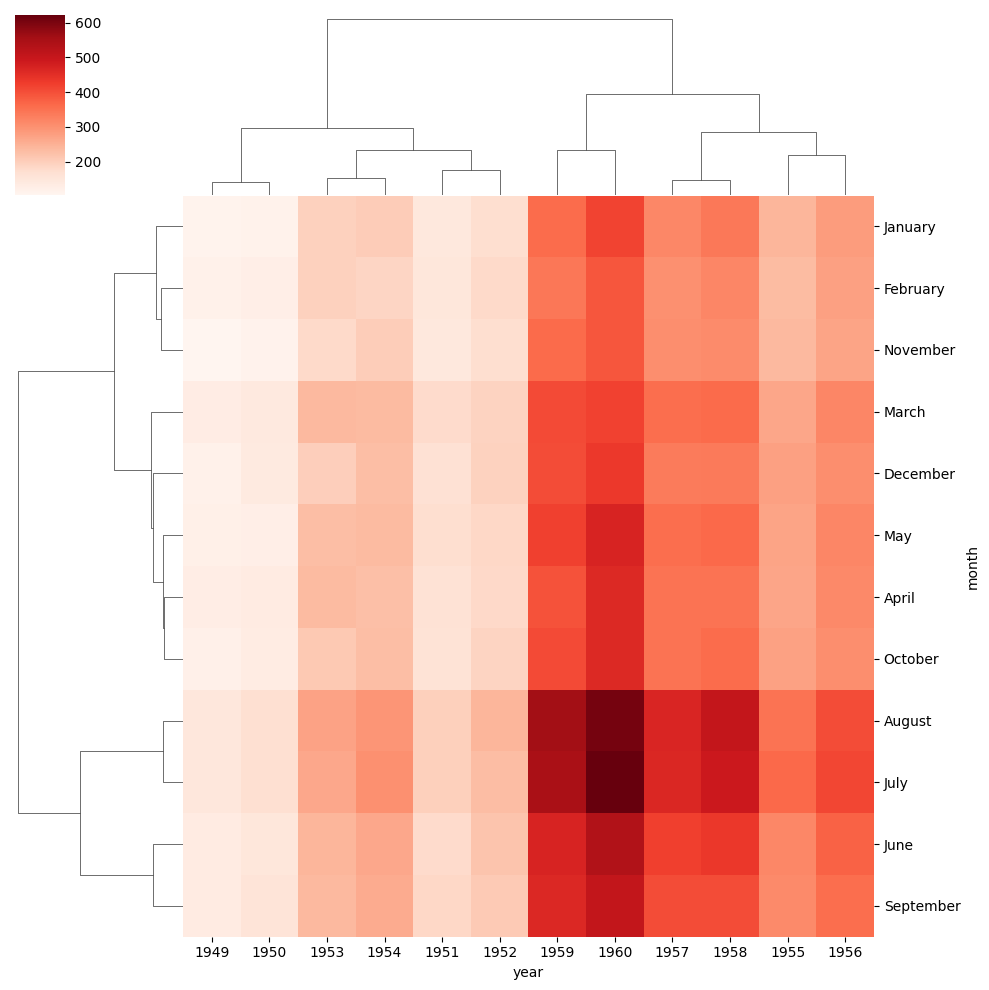

In [31]:
sns.clustermap(flights.pivot_table(values="passengers", index="month", columns="year"),
            cmap="Reds")